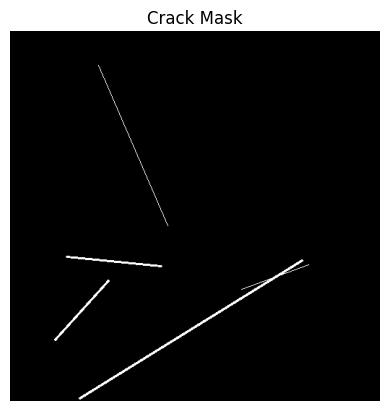

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def create_crack_mask(height, width, num_cracks=5):
    # Create a blank black image
    mask = np.zeros((height, width), dtype=np.uint8)

    # Generate random cracks
    for _ in range(num_cracks):
        # Random starting point
        x1, y1 = np.random.randint(0, width), np.random.randint(0, height)
        
        # Random ending point
        x2, y2 = np.random.randint(0, width), np.random.randint(0, height)
        
        # Random thickness of the crack
        thickness = np.random.randint(1, 3)
        
        # Draw a line (crack) on the mask
        cv2.line(mask, (x1, y1), (x2, y2), 255, thickness)

    return mask

# Define the dimensions of the mask
height, width = 512, 512

# Create the crack mask
crack_mask = create_crack_mask(height, width)

# Display the mask using matplotlib
plt.imshow(crack_mask, cmap='gray')
plt.title('Crack Mask')
plt.axis('off')
plt.show()

# Save the mask as an image file
# cv2.imwrite('crack_mask.png', crack_mask)


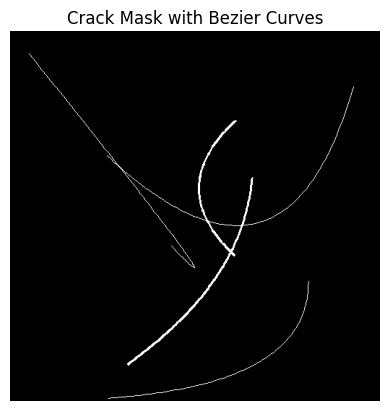

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def bezier_curve(p0, p1, p2, t):
    """计算贝塞尔曲线的点"""
    return (1 - t) ** 2 * p0 + 2 * (1 - t) * t * p1 + t ** 2 * p2

def create_crack_mask(height, width, num_cracks=5):
    # Create a blank black image
    mask = np.zeros((height, width), dtype=np.uint8)

    for _ in range(num_cracks):
        # Random starting point
        x1, y1 = np.random.randint(0, width), np.random.randint(0, height)
        
        # Random control point
        x2, y2 = np.random.randint(0, width), np.random.randint(0, height)
        
        # Random ending point
        x3, y3 = np.random.randint(0, width), np.random.randint(0, height)
        
        # Generate the points of the bezier curve
        num_points = 100
        t_values = np.linspace(0, 1, num_points)
        points = np.array([bezier_curve(np.array([x1, y1]), np.array([x2, y2]), np.array([x3, y3]), t) for t in t_values], dtype=np.int32)

        # Random thickness of the crack
        thickness = np.random.randint(1, 3)

        # Draw the bezier curve on the mask
        for i in range(len(points) - 1):
            cv2.line(mask, tuple(points[i]), tuple(points[i+1]), 255, thickness)

    return mask

# Define the dimensions of the mask
height, width = 512, 512

# Create the crack mask
crack_mask = create_crack_mask(height, width)

# Display the mask using matplotlib
plt.imshow(crack_mask, cmap='gray')
plt.title('Crack Mask with Bezier Curves')
plt.axis('off')
plt.show()

# Save the mask as an image file
# cv2.imwrite('crack_mask_bezier.png', crack_mask)


In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

def generate_crack(mask, start_point, direction, length, width, num_branches=3, branch_prob=0.2):
    if length <= 0 or width <= 0:
        return

    end_point = (
        start_point[0] + int(length * np.cos(direction)),
        start_point[1] + int(length * np.sin(direction))
    )
    
    # Draw the main crack segment
    cv2.line(mask, start_point, end_point, 255, width)
    
    # Update start_point for the next segment
    start_point = end_point
    
    # Randomly determine whether to create branches
    if random.random() < branch_prob:
        for _ in range(num_branches):
            branch_direction = direction + np.random.uniform(-np.pi / 4, np.pi / 4)
            branch_length = length * np.random.uniform(0.5, 1.0)
            branch_width = max(1, int(width * np.random.uniform(0.5, 1.0)))
            generate_crack(mask, start_point, branch_direction, branch_length, branch_width, num_branches, branch_prob)
    
    # Continue the main crack
    new_direction = direction + np.random.uniform(-np.pi / 8, np.pi / 8)
    new_length = length * np.random.uniform(0.8, 1.2)
    new_width = max(1, int(width * np.random.uniform(0.8, 1.2)))
    generate_crack(mask, start_point, new_direction, new_length, new_width, num_branches, branch_prob)

def create_crack_mask(height, width, num_cracks=3):
    mask = np.zeros((height, width), dtype=np.uint8)
    
    for _ in range(num_cracks):
        # Random starting point
        start_x = np.random.randint(0, width)
        start_y = np.random.randint(0, height)
        start_point = (start_x, start_y)
        
        # Random initial direction
        direction = np.random.uniform(0, 2 * np.pi)
        
        # Random initial length and width
        length = np.random.uniform(20, 50)
        width = np.random.randint(1, 3)
        
        generate_crack(mask, start_point, direction, length, width)
    
    return mask

# Define the dimensions of the mask
height, width = 512, 512

# Create the crack mask
crack_mask = create_crack_mask(height, width)

# Display the mask using matplotlib
plt.imshow(crack_mask, cmap='gray')
plt.title('Crack Mask with Branching')
plt.axis('off')
plt.show()

# Save the mask as an image file
# cv2.imwrite('crack_mask_branching.png', crack_mask)


RecursionError: maximum recursion depth exceeded while calling a Python object

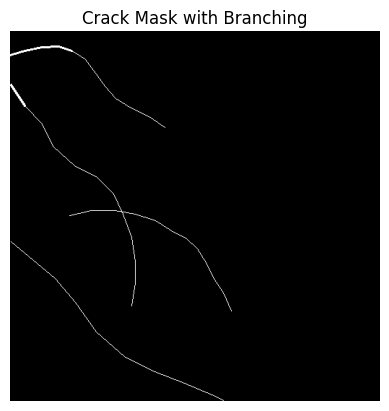

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import math

def generate_crack(mask, start_point, direction, length, width, num_branches=3, branch_prob=0.1, max_depth=10):
    queue = [(start_point, direction, length, width, 0)]
    
    while queue:
        current_point, current_direction, current_length, current_width, depth = queue.pop(0)
        
        if current_length <= 0 or current_width <= 0 or depth > max_depth:
            continue
        
        end_point = (
            current_point[0] + int(current_length * np.cos(current_direction)),
            current_point[1] + int(current_length * np.sin(current_direction))
        )
        
        # Draw the main crack segment
        cv2.line(mask, current_point, end_point, 255, current_width)
        
        # Randomly determine whether to create branches
        if random.random() < branch_prob:
            for _ in range(num_branches):
                branch_direction = current_direction + np.random.uniform(-np.pi / 4, np.pi / 4)
                branch_length = current_length * np.random.uniform(0.5, 1.0)
                branch_width = max(1, int(current_width * np.random.uniform(0.5, 1.0)))
                queue.append((end_point, branch_direction, branch_length, branch_width, depth + 1))
        
        # Continue the main crack
        new_direction = current_direction + np.random.uniform(-np.pi / 8, np.pi / 8)
        new_length = current_length * np.random.uniform(0.8, 1.2)
        new_width = max(1, int(current_width * np.random.uniform(0.8, 1.2)))
        queue.append((end_point, new_direction, new_length, new_width, depth + 1))

def create_crack_mask(height, width, num_cracks=4):
    mask = np.zeros((height, width), dtype=np.uint8)
    
    for _ in range(num_cracks):
        # Random starting point
        start_x = np.random.randint(0, width)
        start_y = np.random.randint(0, height)
        start_point = (start_x, start_y)
        
        # Random initial direction
        direction = np.random.uniform(0, 2 * np.pi)
        
        # Random initial length and width
        length = np.random.uniform(20, 50)
        width = np.random.randint(1, 3)
        
        generate_crack(mask, start_point, direction, length, width)
    
    return mask

# Define the dimensions of the mask
height, width = 512, 512

# Create the crack mask
crack_mask = create_crack_mask(height, width)

# Display the mask using matplotlib
plt.imshow(crack_mask, cmap='gray')
plt.title('Crack Mask with Branching')
plt.axis('off')
plt.show()

# Save the mask as an image file
# cv2.imwrite('crack_mask_branching.png', crack_mask)
